In [1]:
pip install mne

   ---------------------------------------- 0.0/7.4 MB ? eta -:--:--
   - -------------------------------------- 0.3/7.4 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.4 MB 1.3 MB/s eta 0:00:06
   ----- ---------------------------------- 1.0/7.4 MB 1.6 MB/s eta 0:00:04
   -------- ------------------------------- 1.6/7.4 MB 1.9 MB/s eta 0:00:04
   ----------- ---------------------------- 2.1/7.4 MB 2.2 MB/s eta 0:00:03
   -------------- ------------------------- 2.6/7.4 MB 2.1 MB/s eta 0:00:03
   ---------------- ----------------------- 3.1/7.4 MB 2.2 MB/s eta 0:00:02
   ------------------- -------------------- 3.7/7.4 MB 2.2 MB/s eta 0:00:02
   --------------------- ------------------ 3.9/7.4 MB 2.2 MB/s eta 0:00:02
   ------------------------ --------------- 4.5/7.4 MB 2.1 MB/s eta 0:00:02
   -------------------------- ------------- 5.0/7.4 MB 2.2 MB/s eta 0:00:02
   ----------------------------- ---------- 5.5/7.4 MB 2.2 MB/s eta 0:00:01
   -----------------------

In [17]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from scipy.signal import coherence, hilbert

In [9]:
edf_path = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf"

sfreq_target = 256   # frecuencia de muestra a la que normalizamos
fmin, fmax = 8,13   # banda alfa para la coherencia (se puede ajustar)

In [10]:
raw = mne.io.read_raw_edf(edf_path, preload=True)
raw.resample(sfreq_target)
raw.filter(1., 45., fir_design='firwin')
data = raw.get_data()
ch_names = raw.info['ch_names']
n_channels = len(ch_names)

Extracting EDF parameters from C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S03_datasets\EEG_practica\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\HP\AppData\Local\Temp\ipykernel_556\1857893954.py:1: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(edf_path, preload=True)


Sampling frequency of the instance is already 256.0, returning unmodified.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (3.301 s)



In [12]:
ch_names

['FP1-F7',
 'F7-T7',
 'T7-P7',
 'P7-O1',
 'FP1-F3',
 'F3-C3',
 'C3-P3',
 'P3-O1',
 'FP2-F4',
 'F4-C4',
 'C4-P4',
 'P4-O2',
 'FP2-F8',
 'F8-T8',
 'T8-P8-0',
 'P8-O2',
 'FZ-CZ',
 'CZ-PZ',
 'P7-T7',
 'T7-FT9',
 'FT9-FT10',
 'FT10-T8',
 'T8-P8-1']

In [14]:
# ====== 1. MATRIZ DE CORRELACIÓN DE PEARSON ======
corr_matrix = np.corrcoef(data)
corr_df = pd.DataFrame(corr_matrix, index=ch_names, columns=ch_names)
corr_df.to_csv("connectivity_pearson.csv")

# ====== 2. MATRIZ DE COHERENCIA ESPECTRAL ======
coh_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        f, Cxy = coherence(data[i], data[j], fs=sfreq_target, nperseg=sfreq_target*2)
        mask = (f >= fmin) & (f <= fmax)
        coh_matrix[i, j] = np.mean(Cxy[mask])

coh_df = pd.DataFrame(coh_matrix, index=ch_names, columns=ch_names)
coh_df.to_csv("connectivity_coherence.csv")

# ====== 3. MATRIZ DE PHASE LOCKING VALUE (PLV) ======
analytic_signal = hilbert(data)
phase_data = np.angle(analytic_signal)

plv_matrix = np.zeros((n_channels, n_channels))
for i in range(n_channels):
    for j in range(n_channels):
        phase_diff = phase_data[i] - phase_data[j]
        plv_matrix[i, j] = np.abs(np.sum(np.exp(1j * phase_diff)) / phase_diff.size)

plv_df = pd.DataFrame(plv_matrix, index=ch_names, columns=ch_names)
plv_df.to_csv("connectivity_plv.csv")

print("✅ Matrices de conectividad generadas:")
print("- connectivity_pearson.csv")
print("- connectivity_coherence.csv")
print("- connectivity_plv.csv")


✅ Matrices de conectividad generadas:
- connectivity_pearson.csv
- connectivity_coherence.csv
- connectivity_plv.csv


### tarea
en que caso cada uno de estos tres metodos es el adecuado
identificar para que son los argumentos de la matriz de 1. MATRIZ DE CORRELACIÓN DE PEARSON  fs=sfreq_target, nperseg=sfreq_target*2

### actividad clase 
1. generar el mapa de calor de cada matriz de conectividad 
2. generar la distribucion de datos de cada matriz de conectividad
3. ¿que valor se encuentra en el percentil 0.75 de cada matriz de conectividad?
4. generar el grafo 2d de cada matriz de conectividad y compararlos
5. generar el grafo 3d de cada matriz de conec y comparar

In [15]:
corr_df.head (3)

,FP1-F7,F7-T7,T7-P7,P7-O1,FP1-F3,F3-C3,C3-P3,P3-O1,FP2-F4,F4-C4,...,F8-T8,T8-P8-0,P8-O2,FZ-CZ,CZ-PZ,P7-T7,T7-FT9,FT9-FT10,FT10-T8,T8-P8-1
FP1-F7,1.000000,0.103592,-0.070391,0.008550,0.792282,0.402987,0.221081,0.130110,0.744005,0.462771,...,0.487322,0.003882,0.100852,0.437392,0.210561,0.070391,0.282011,-0.246338,-0.040157,0.003882
F7-T7,0.103592,1.000000,0.138700,0.005079,0.491057,0.419551,0.195553,0.135568,0.384312,0.217138,...,0.137333,0.091827,-0.043687,0.309492,0.211246,-0.138700,-0.599087,0.395563,-0.099850,0.091827
T7-P7,-0.070391,0.138700,1.000000,0.149314,0.118458,0.308218,0.338679,0.291802,0.102540,0.161603,...,0.063399,0.326646,0.051256,0.224985,0.272034,-1.000000,0.100195,0.261074,-0.060052,0.326646


<Axes: >

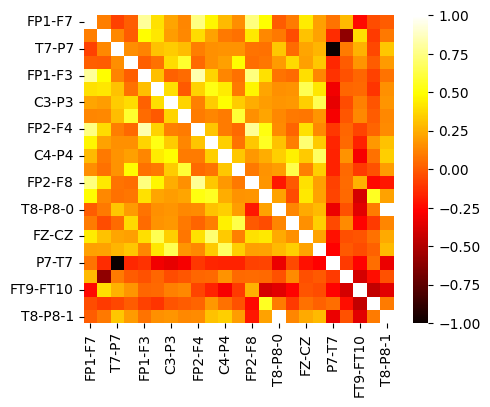

In [22]:
plt.figure(figsize=(5, 4))
sns.heatmap(corr_df, cmap='hot')

<Axes: >

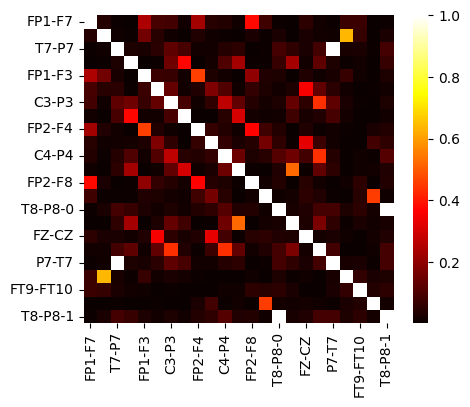

In [21]:
plt.figure(figsize=(5, 4))
sns.heatmap(coh_df, cmap='hot')

<Axes: >

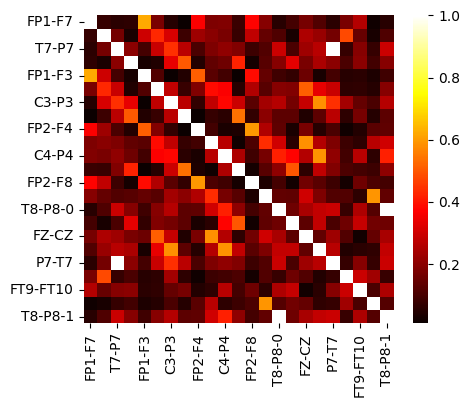

In [23]:
plt.figure(figsize=(5, 4))
sns.heatmap(plv_df, cmap='hot')

(array([  4., 112., 354.,  59.]),
 array([-1. , -0.5,  0. ,  0.5,  1. ]),
 <BarContainer object of 4 artists>)

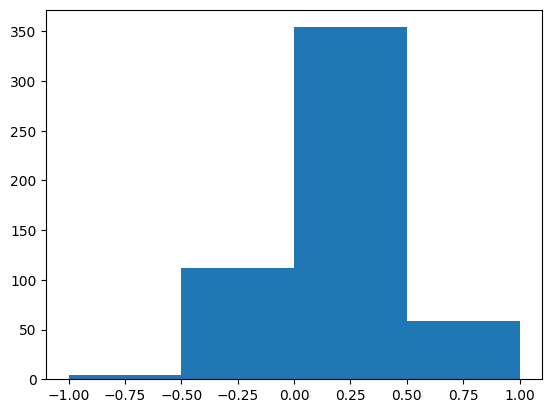

In [24]:
aplanada = np.ravel(corr_df) 
hist = plt.hist(aplanada, bins=4)
hist

(array([476.,  22.,   4.,  27.]),
 array([0.00104799, 0.250786  , 0.500524  , 0.750262  , 1.        ]),
 <BarContainer object of 4 artists>)

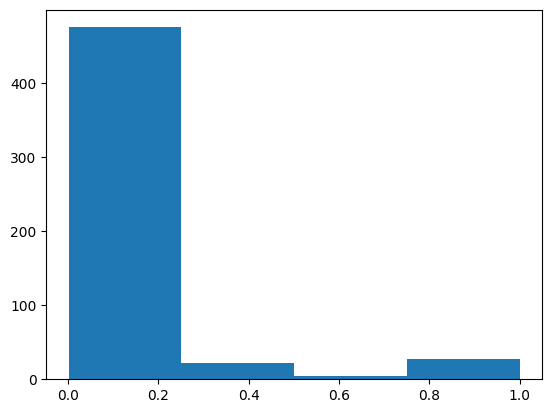

In [25]:
aplanada = np.ravel(coh_df) 
hist = plt.hist(aplanada, bins=4)
hist

(array([374., 110.,  18.,  27.]),
 array([0.00893847, 0.25670385, 0.50446924, 0.75223462, 1.        ]),
 <BarContainer object of 4 artists>)

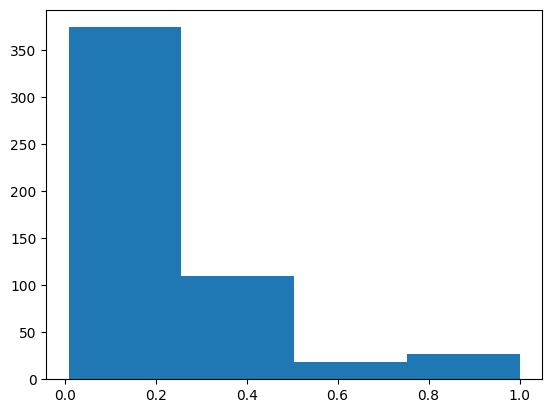

In [26]:
aplanada = np.ravel(plv_df) 
hist = plt.hist(aplanada, bins=4)
hist

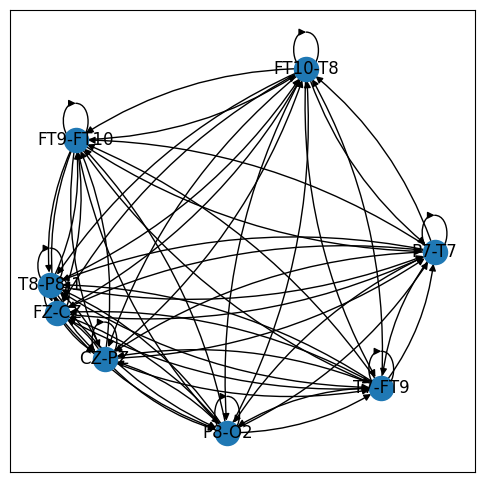

In [27]:
G = nx.from_pandas_adjacency(corr_df.iloc[15:35, 15:35], create_using = nx.DiGraph())

plt.figure(figsize=(6,6))
pos= nx.spring_layout(G)
nx.draw_networkx(G, with_labels=True, arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.15')

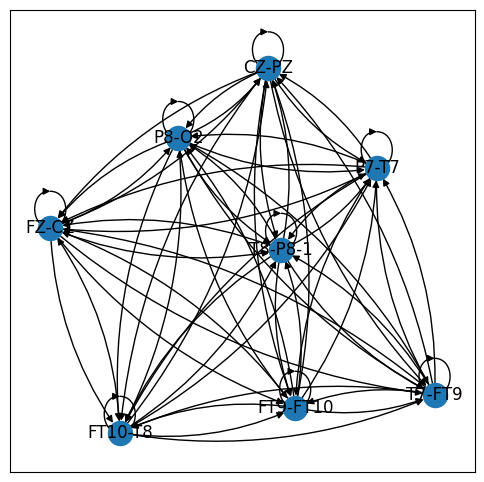

In [30]:
G = nx.from_pandas_adjacency(coh_df.iloc[15:35, 15:35], create_using = nx.DiGraph())

plt.figure(figsize=(6,6))
pos= nx.spring_layout(G)
nx.draw_networkx(G, with_labels=True, arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.15')

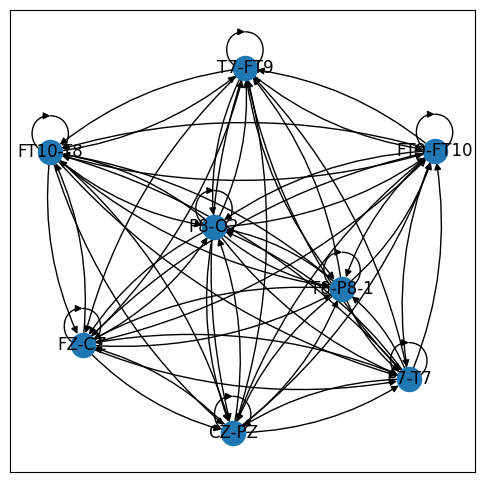

In [31]:
G = nx.from_pandas_adjacency(plv_df.iloc[15:35, 15:35], create_using = nx.DiGraph())

plt.figure(figsize=(6,6))
pos= nx.spring_layout(G)
nx.draw_networkx(G, with_labels=True, arrows=True, arrowstyle='-|>', connectionstyle='arc3,rad=0.15')

In [32]:
pos2D= {canal: (corr_df.loc[canal, 'x'],
                corr_df.loc[canal, 'y']) for canal in corr_df.index}

plt.figure(figsize=(4,4))
nx.draw_networkx(G, pos=pos2D)
plt.show()

KeyError: 'x'

In [29]:
pos3D= {canal: (corr_df.loc[canal, 'x'],
                corr_df.loc[canal, 'y'],
                corr_df.loc[canal, 'z']) for canal in corr_df.index}

fig = plt.figure(figsize=(4,4))
## definir el tamaño
ax = fig.add_subplot(111, projection='3d')
## contar los subplots que voy a tener y que de esos vaya uno por uno (111)

## dibujar nodos en 3d
for canal, (x, y, z) in pos3D.items():
    ax.scatter(x, y, z, s=100)
    ax.text(x, y, z+0.03, canal, fontsize=10, ha='center')

for i, j, data in G.edges(data=True):
    x= [pos3D[i][0], pos3D[j][0]]
    y= [pos3D[i][1], pos3D[j][1]]
    z= [pos3D[i][2], pos3D[j][2]]
    ax.plot(x, y, z, linewidth=data['weight']*5)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Red de conectividad EEG (3D)')
plt.show()

KeyError: 'x'